In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Get the Dataset

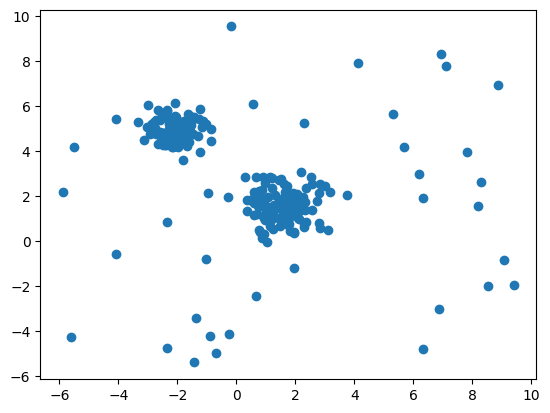

In [193]:
# Get the dataset from csv file
df_hc = pd.read_csv('healthcare.csv')

# Plot the dataset
plt.scatter(df_hc['0'], df_hc['1'])
plt.show()

## Anomaly Detection using Isolation Forest

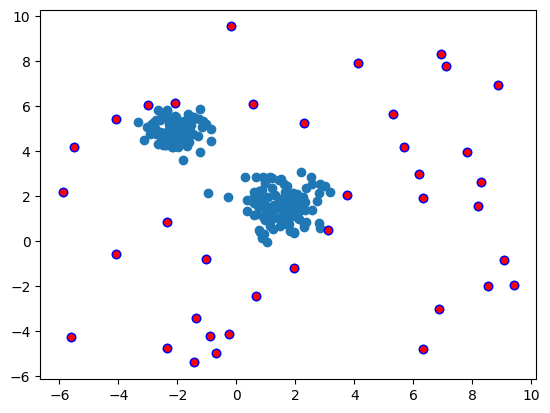

In [170]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.15)
clf.fit(df_hc)
predictions = clf.predict(df_hc)

# Identify index of outliers (outliers will havel label as -1)
index_hc = np.where(predictions < 0)

# Plot the data
plt.scatter(df_hc['0'], df_hc['1'])
plt.scatter(df_hc.iloc[index_hc[0], 0], df_hc.iloc[index_hc[0], 1], c='r', edgecolors="b")
plt.show()

## Anomaly Detection using DBScan

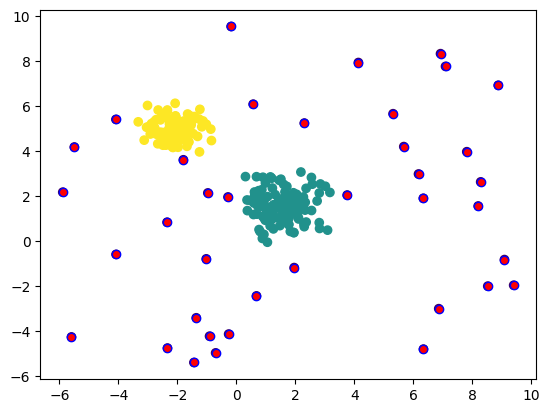

In [171]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.55)
dbscan.fit(df_hc)

# Identify index of outliers (outliers will havel label as -1)
index_hc = np.where(dbscan.labels_ < 0)

# Draw scatter plot with outliers highlighted
plt.scatter(df_hc['0'], df_hc['1'], c=dbscan.labels_)
plt.scatter(df_hc.iloc[index_hc[0], 0], df_hc.iloc[index_hc[0], 1], c='r' ,edgecolors="b")
plt.show()

## Anomaly Detection using Local Outlier Factor

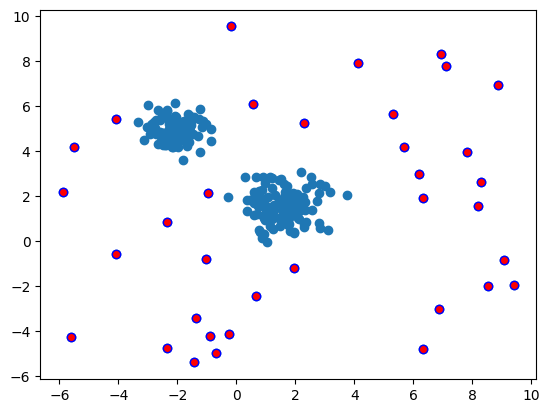

In [191]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(contamination =0.14)
predictions = lof.fit_predict(df_hc)

# Identify index of outliers (outliers will havel label as -1)
index_hc = np.where(predictions < 0)

# Plot the data
plt.scatter(df_hc['0'], df_hc['1'])
plt.scatter(df_hc.iloc[index_hc[0], 0], df_hc.iloc[index_hc[0], 1], c='r', edgecolors="b")
plt.show()